<span style="font-size: 38px; color: Green; font-weight: bold;">"Where Should I Live"</span><br>
<span style="font-size: 28px; color: Orange; font-weight: bold;">Group Project 
Programming for Data Science 2025/26
</span>


<span style="font-size: 28px; color: Red; font-weight: bold;">LCD_PDS_2526_Group22</span>

<span style="font-size: 18px; color: Purple; font-weight: bold;">Student Id:20251000 Student Name: Atila Soleimanian </span><br>
<span style="font-size: 18px; color: Purple; font-weight: bold;">Student Id:20241027 Student Name: Ali Fardin Gulistani</span><br>
<span style="font-size: 18px; color: Purple; font-weight: bold;">Student Id:20241831 Student Name: Daniyal Ahmad </span><br>
<span style="font-size: 18px; color: Purple; font-weight: bold;">Student Id:20241418  Student Name: A K M Saif Hoque</span>

# STEP 1: IMPORTING DATASET & LIBRARIES 

In [756]:
#!pip install pandas (In case if the pandas show eror uncomment by deleting hashtag and also deleting the texts in bracket and install pandas)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [757]:
df=pd.read_csv('city_data.csv',sep="|") #provided file uses pipe '|' as delimiter, so the dataset is separated from the delimiter '|'.

In [758]:
df.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
1,"Vienna, Austria",310,2983513,2018818,20.1,10.2,55770,3,"German, English, Turkish, Serbian",2500,1050,2061,340,2024-06-15 00:00:00


### As we can see, the first row of the dataset doesn't apply any importance as the names of the features are described in the 2nd row. So we will remove the first row using ***header***

In [759]:
df=pd.read_csv('city_data.csv',sep="|",header=1)

In [760]:
df.head(2)

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00


# STEP 2: STATISTICS OF THE DATASET

In [761]:
print(f'The shape of the dataset is {df.shape}')     

The shape of the dataset is (86, 14)


In [762]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             86 non-null     object 
 1   Population Density               85 non-null     float64
 2   Population                       86 non-null     int64  
 3   Working Age Population           85 non-null     float64
 4   Youth Dependency Ratio           86 non-null     float64
 5   Unemployment Rate                85 non-null     float64
 6   GDP per Capita                   85 non-null     float64
 7   Days of very strong heat stress  86 non-null     int64  
 8   Main Spoken Languages            85 non-null     object 
 9   Average Monthly Salary           86 non-null     int64  
 10  Avgerage Rent Price              86 non-null     int64  
 11  Average Cost of Living           86 non-null     int64  
 12  Average Price Groceries 

In [763]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population Density,85.0,1.115141e+03,2.542779e+03,65.00,304.000,548.00,1020.000,20983.0
Population,86.0,1.754370e+06,1.843133e+06,73895.00,528118.500,1178397.00,2315896.000,12396541.0
Working Age Population,85.0,1.158294e+06,1.232534e+06,46359.00,358020.000,733794.00,1534225.000,8274794.0
Youth Dependency Ratio,86.0,2.409686e+01,3.266421e+00,19.30,21.425,23.15,25.925,37.8
Unemployment Rate,85.0,6.667059e+00,4.553632e+00,1.40,3.700,5.30,8.100,23.0
GDP per Capita,85.0,5.175027e+04,2.149562e+04,10089.92,38664.000,49329.00,63083.000,146094.0
Days of very strong heat stress,86.0,4.348837e+00,1.003848e+01,0.00,0.000,1.00,3.000,59.0
Average Monthly Salary,86.0,2.434488e+03,1.188603e+03,750.00,1412.500,2400.00,3200.000,6636.0
Avgerage Rent Price,86.0,1.070105e+03,4.989646e+02,100.00,800.000,1050.00,1250.000,3190.0
Average Cost of Living,86.0,1.808384e+03,7.279997e+02,800.00,1300.000,1665.00,2100.000,4862.0


# STEP 3: DATA TYPES & CONVERSION 

 ### From the description of the dataset, it's clearly visible that most of the features don't need **float64** as a datatype. So the datatypes are converted below as their need

In [764]:
df = df.astype({'Population Density' : 'float32', 
                'Population': 'float32',
                'Youth Dependency Ratio': 'float32',
                'Unemployment Rate': 'float32',
                'GDP per Capita': 'float32',
                'Days of very strong heat stress':'float32',
                'Average Monthly Salary':'float32',
                'Avgerage Rent Price':'float32',
                'Average Price Groceries':'float32',
                'Average Cost of Living':'float32'
                })

 CHANGING <span style="font-size: 23px; color: Green;font-weight: bold ;">"Last Date Update "</span> column datatype ***object*** into ***datetime*** datatype.

In [765]:
df['Last Data Update'] = pd.to_datetime(df['Last Data Update'])
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   City                             86 non-null     object        
 1   Population Density               85 non-null     float32       
 2   Population                       86 non-null     float32       
 3   Working Age Population           85 non-null     float64       
 4   Youth Dependency Ratio           86 non-null     float32       
 5   Unemployment Rate                85 non-null     float32       
 6   GDP per Capita                   85 non-null     float32       
 7   Days of very strong heat stress  86 non-null     float32       
 8   Main Spoken Languages            85 non-null     object        
 9   Average Monthly Salary           86 non-null     float32       
 10  Avgerage Rent Price              86 non-null     float32       


### As we can see, nearly 10 KB has been less in memory usage for data conversion.

# STEP 4 DATA QUALITY CHECK 
## ***4.1>MISSING VALUE*** 
## ***4.2>DUPLICATE VALUE***
## ***4.3>VALUE RANGE CHECK***

## 4.1> <span style="font-size: 23px; color:ORANGE;font-weight: bold ;">MISSING VALUE</span>

In [766]:
missing_data = df.isnull().sum().reset_index()
missing_data.columns = ['Column', 'MissingCount']
missing_data['MissingPercent'] = (missing_data['MissingCount'] / len(df)) * 100
missing_data.sort_values(by='MissingPercent',ascending=False)

,Column,MissingCount,MissingPercent
12,Average Price Groceries,80,93.023256
1,Population Density,1,1.162791
3,Working Age Population,1,1.162791
5,Unemployment Rate,1,1.162791
6,GDP per Capita,1,1.162791
8,Main Spoken Languages,1,1.162791
0,City,0,0.000000
2,Population,0,0.000000
4,Youth Dependency Ratio,0,0.000000
7,Days of very strong heat stress,0,0.000000


## Missing Value analysis 
- As we can see, out of 86 entries in the dataset, there are 80 missing values in the **Average Price Groceries** column, which has more than 93% missing values in the dataset.


## 4.2> <span style="font-size: 23px; color:ORANGE;font-weight: bold ;">DUPLICATED VALUE</span>

In [767]:
duplicate_rows = df[df.duplicated(keep=False)]
print(f'Total number of duplicate rows: {len(duplicate_rows)}')

Total number of duplicate rows: 4


In [768]:
print(" Duplicate Rows  Are:")
print(duplicate_rows[['City', 'Population', 'Average Monthly Salary', 
                          'Last Data Update']])

 Duplicate Rows  Are:
               City  Population  Average Monthly Salary Last Data Update
15  Berlin. Germany   5303922.0                  3200.0       2023-06-29
16  Berlin. Germany   5303922.0                  3200.0       2023-06-29
32    Malaga, Spain    869096.0                  2200.0       2023-11-27
33    Malaga, Spain    869096.0                  2200.0       2023-11-27


- As we can see, there are 4 rows with 2 identical values. 

## 4.3> <span style="font-size: 23px; color:ORANGE;font-weight: bold ;">VALUE RANGE DETECTION</span>

In [769]:
print("### VALUE RANGE VALIDATION ###\n")

if df['Population'].min() < 0:
    print("Population has negative values")
else:
    print("Population Ok (all positive)")

un_min = df['Unemployment Rate'].min()
un_max = df['Unemployment Rate'].max()
if un_min < 0 or un_max > 100:
    print(f' Unemployment Rate Outside 0–100: {un_min}% to {un_max}%')
else:
    print(f'Unemployment Rate Ok: {un_min}% to {un_max}% . So,Unemployment rate within valid range')


yd_min = df['Youth Dependency Ratio'].min()
yd_max = df['Youth Dependency Ratio'].max()
if yd_min < 0 or yd_max > 100:
    print(f' Youth Dependency Ratio Outside 0–100: {yd_min}% to {yd_max}%')
else:
    print(f' Youth Dependency Ratio Ok: {yd_min}% to {yd_max}%')


sal_min = df['Average Monthly Salary'].min()
if sal_min < 0:
    print(' Salary has negative values')
else:
    print('Salary Ok (all positive)')


### VALUE RANGE VALIDATION ###

Population Ok (all positive)
Unemployment Rate Ok: 1.399999976158142% to 23.0% . So,Unemployment rate within valid range
 Youth Dependency Ratio Ok: 19.299999237060547% to 37.79999923706055%
Salary Ok (all positive)


# STEP 5 DATA CLEANING & ANSWER TO Q1 
## ***5.1>FIXING TYPO*** 
## ***5.2>FIXING CITY FEATURE***
## ***5.3> HANDLING DUPLICATE VALUE***(Q1)
## ***5.4>HANDLING MISSING VALUE***(Q1)

## 5.1> <span style="font-size: 23px; color:ORANGE;font-weight: bold ;">FIXING TYPO</span>

In [770]:
df.columns.tolist()

['City',
 'Population Density',
 'Population',
 'Working Age Population ',
 'Youth Dependency Ratio',
 'Unemployment Rate',
 'GDP per Capita',
 'Days of very strong heat stress',
 'Main Spoken Languages',
 'Average Monthly Salary',
 'Avgerage Rent Price',
 'Average Cost of Living',
 'Average Price Groceries',
 'Last Data Update']

-As we can see in the <span style="font-size: 15px; color:RED;font-weight: bold ;">'Avgerage Rent Price'</span> there is a typing mistake which is ***avgerage*** and we need to change it into ***Average***

In [771]:
df.rename(columns={'Avgerage Rent Price': 'Average Rent Price'}, inplace=True)
df.head(1)

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513.0,2018818.0,20.1,10.2,55770.0,3.0,"German, English, Turkish, Serbian",2500.0,1050.0,2061.0,340.0,2024-06-15


In [772]:
print('___________Before_____________')
df.iloc[45]['City']

___________Before_____________


'Greece, Athens'

- As we can see in the <span style="font-size: 15px; color:RED;font-weight: bold ;">***City***</span> feature in the 45th row there is a mistake that the name of the country is written first and name of the city after comma which is unsual then other examples in the ***City*** feature.
- We will fix this by replacing <span style="font-size: 15px; color:RED;font-weight: bold ;">'Greece, Athens'</span> with <span style="font-size: 15px; color:green;font-weight: bold ;">'Athens, Greece'</span>.

In [773]:
df.iloc[45,0]='Athens, Greece'

In [774]:
print('___________After_____________')
df.iloc[45]['City']

___________After_____________


'Athens, Greece'

In [775]:
df['Main Spoken Languages'] = df['Main Spoken Languages'].str.replace(';', ', ')
df[df['City']== 'Valencia, Spain']

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
30,"Valencia, Spain",NaN,1748142.0,1162828.0,22.6,13.7,33570.0,5.0,"Spanish, Valencian",2400.0,1190.0,1300.0,NaN,2023-06-04


## 5.1> <span style="font-size: 23px; color:ORANGE;font-weight: bold ;">FIXING CITY FEATURE</span>

- In the ***City*** feature, there is a city and a country described in the same feature by separating them with (, . ;). So we will create 2 new columns named ***City_name*** and ***Country*** by splitting them from the City feature for better exploration.

In [776]:
df[['City_Name', 'Country']] = (
    df['City']
    .str.split(r'[,;.]\s*',expand=True)
)

In [777]:
df.head(5)

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update,City_Name,Country
0,"Vienna, Austria",310.0,2983513.0,2018818.0,20.100000,10.2,55770.0,3.0,"German, English, Turkish, Serbian",2500.0,1050.0,2061.0,340.0,2024-06-15,Vienna,Austria
1,"Salzburg, Austria",243.0,375489.0,250472.0,20.299999,3.0,66689.0,0.0,German,3200.0,1100.0,2186.0,NaN,2023-11-03,Salzburg,Austria
2,"Brussels, Belgium",681.0,3284548.0,2137425.0,27.500000,10.7,62500.0,3.0,"French, Dutch, Arabic, English",3350.0,1200.0,1900.0,NaN,2023-04-22,Brussels,Belgium
3,"Antwerp, Belgium",928.0,1139663.0,723396.0,27.700001,6.2,57595.0,3.0,"Dutch, French, Arabic",2609.0,900.0,1953.0,NaN,2024-08-09,Antwerp,Belgium
4,"Gent, Belgium",552.0,645813.0,417832.0,24.799999,NaN,53311.0,2.0,"Dutch, French",2400.0,827.0,1200.0,120.0,2023-07-17,Gent,Belgium


- So, we don't need this city feature for now as we have ***City_Name*** and ***Country*** feature.

In [778]:
df= df.drop(columns=['City'])

## 5.3> <span style="font-size: 23px; color:ORANGE;font-weight: bold ;">HANDLING DUPLICATE VALUE</span><span style="font-size: 23px; color:GREEN;font-weight: bold ;"> (Q1)</span>

In [779]:
df_clean = df.copy()

In [780]:
rows_before = len(df_clean)
df_clean = df_clean.drop_duplicates()

rows_after = len(df_clean)
duplicates_removed = rows_before - rows_after
print(f"Duplicates removed: {duplicates_removed}")

Duplicates removed: 2


In [781]:
df_clean = df_clean.reset_index(drop=True)

- As we removed 2 of the duplicated rows from the dataset, their index were also removed from the dataset. So we need to reset the index .

## 5.4> <span style="font-size: 23px; color:ORANGE;font-weight: bold ;">HANDLING MISSING VALUE</span><span style="font-size: 23px; color:GREEN;font-weight: bold ;">(Q1)</span>

In [782]:
df_clean.isna().sum()

Population Density                  1
Population                          0
Working Age Population              1
Youth Dependency Ratio              0
Unemployment Rate                   1
GDP per Capita                      1
Days of very strong heat stress     0
Main Spoken Languages               1
Average Monthly Salary              0
Average Rent Price                  0
Average Cost of Living              0
Average Price Groceries            78
Last Data Update                    0
City_Name                           0
Country                             0
dtype: int64

## As we can see, there are still 78 missing values in <span style="font-size: 23px; color:green;font-weight: bold ;">***Average Price Groceries***  </span>Column. So, we will drop this feature .

In [783]:
df_clean = df_clean.drop(columns=['Average Price Groceries'])
df_clean.isna().sum()

Population Density                 1
Population                         0
Working Age Population             1
Youth Dependency Ratio             0
Unemployment Rate                  1
GDP per Capita                     1
Days of very strong heat stress    0
Main Spoken Languages              1
Average Monthly Salary             0
Average Rent Price                 0
Average Cost of Living             0
Last Data Update                   0
City_Name                          0
Country                            0
dtype: int64

## Now, we have 5 features with missing values 
- Population Density
- Working Age Population
- Unemployment Rate
- GDP per Capita
- Main Spoken Languages
### We will fill in the missing values using various methods.

# FILLING <span style="font-size: 23px; color:green;font-weight: bold ;">***WORKING AGE POPULATION*** </span>FEATURE missing value

In [784]:
missing_working_age = df_clean['Working Age Population '].isna()
missing_working_age.sum()

np.int64(1)

In [785]:
print('..................BEFORE..............')


print(df_clean[missing_working_age][['City_Name','Country', 'Population', 'Working Age Population ']])

..................BEFORE..............
     City_Name  Country  Population  Working Age Population 
23  Dusseldorf  Germany   1554077.0                      NaN


- As we can see, there is 1 missing value in this feature, and we are going to fill this by taking the median ratio between the feature and ***population*** 

In [786]:
print('..................AFTER..............')


working_age_ratio = (df_clean['Working Age Population '] / df_clean['Population']).median()
print(f"Median ratio of Working Age to Total Population: {working_age_ratio}%")
df_clean.loc[missing_working_age, 'Working Age Population '] = (df_clean.loc[missing_working_age, 'Population'] * working_age_ratio).round()
print(df_clean[missing_working_age][['City_Name', 'Country','Population', 'Working Age Population ']])

..................AFTER..............
Median ratio of Working Age to Total Population: 0.6589942050401019%
     City_Name  Country  Population  Working Age Population 
23  Dusseldorf  Germany   1554077.0                1024128.0


In [787]:
df_clean.loc[23, 'Working Age Population ']

np.float64(1024128.0)

## In this case, we are taking the median of the ratio between ***Working Age Population*** and ***Population***. 
## At first, look at rows where the Working Age Population is missing
## Then take the population of that row
## Then Multiply population × ratio
## At last, we fill the missing values 

# FILLING <span style="font-size: 23px; color:green;font-weight: bold ;">***Unemployment Rate*** </span>FEATURE missing value

In [788]:
missing_unemployment_rate=df_clean['Unemployment Rate'].isna()

In [789]:
print(df_clean[missing_unemployment_rate][['City_Name','Country', 'Population', 'Unemployment Rate' ]])

  City_Name  Country  Population  Unemployment Rate
4      Gent  Belgium    645813.0                NaN


In [790]:
df_clean['Unemployment Rate'] = df_clean['Unemployment Rate'].interpolate(method='linear')
print(df_clean[missing_unemployment_rate][['City_Name', 'Country','Population', 'Unemployment Rate' ]])

  City_Name  Country  Population  Unemployment Rate
4      Gent  Belgium    645813.0                5.9


In [791]:
df_clean.loc[ 4,'Unemployment Rate']

np.float32(5.8999996)

## In this case, we are using the linear interpolation method, which fills missing values by creating a value between the numbers above and below the missing point.

# FILLING <span style="font-size: 23px; color:green;font-weight: bold ;">***GDP per Capita*** </span>FEATURE missing value

In [792]:
missing_gdp = df_clean['GDP per Capita'].isna()
missing_count = missing_gdp.sum()

for idx in df_clean[missing_gdp].index:
    country = df_clean.loc[idx, 'Country']
    print('__________Before__________')
    print(df_clean.loc[idx, ['City_Name', 'Country', 'GDP per Capita']])  
        
    country_gdp_mean = df_clean[df_clean['Country'] == country]['GDP per Capita'].mean()
    df_clean.loc[idx, 'GDP per Capita'] = country_gdp_mean
    print('__________After__________')  
    print(df_clean.loc[idx, ['City_Name', 'Country', 'GDP per Capita']])

__________Before__________
City_Name         Lemesos
Country            Cyprus
GDP per Capita        NaN
Name: 12, dtype: object
__________After__________
City_Name         Lemesos
Country            Cyprus
GDP per Capita    34907.0
Name: 12, dtype: object


- For filling the missing value, here we go through each row to check where the missing value is and create a true/false table by ***df_clean['GDP per Capita'].isna()*** and store it into ***missing_gdp***.
- ***missing_count = missing_gdp.sum()*** counts how many values are true, which means how many missing values there are.
- Then we use a for loop to select all rows where ***GDP per Capita*** is missing and loop through their indexes.
- ***country = df_clean.loc[idx, 'Country']*** by this code, we go to the country where there is a missing value, and here we found that there is a missing value in the country **Cyprus**.
- ***country_gdp_mean = df_clean[df_clean['Country'] == country]['GDP per Capita'].mean()*** This code filters all rows from **Cyprus** country and takes the mean ***GDP per Capita*** of  **Cyprus**.
- ***df_clean.loc[idx, 'GDP per Capita'] = country_gdp_mean*** This code fills the missing value with the mean of **Cyprus**.

# FILLING <span style="font-size: 23px; color:green;font-weight: bold ;">***Population Density*** </span>FEATURE missing value

In [793]:
missing_density = df_clean['Population Density'].isna()
missing_count = missing_density.sum()
for idx in df_clean[missing_density].index:
    country = df_clean.loc[idx, 'Country']
    print('__________Before__________')
    print(df_clean.loc[idx, ['City_Name', 'Country', 'Population Density']])
        
    country_density_median = df_clean[df_clean['Country'] == country ]['Population Density'].median()
    df_clean.loc[idx, 'Population Density'] = country_density_median
    print('__________After__________')   
    print(df_clean.loc[idx, ['City_Name', 'Country', 'Population Density']])

__________Before__________
City_Name             Valencia
Country                  Spain
Population Density         NaN
Name: 29, dtype: object
__________After__________
City_Name             Valencia
Country                  Spain
Population Density       722.0
Name: 29, dtype: object


- For filling the missing value, here we go through each row to check where the missing value is and create a true/false table by ***df_clean['Population Density'].isna()*** and store it into ***missing_density***.
- ***missing_count = missing_density.sum()*** counts how many values are true, which means how many missing values there are.
- Then we use a for loop to select all rows where ***'Population Density'*** is missing and loop through their indexes.
- ***country = df_clean.loc[idx, 'Country']*** by this code, we go to the country where there is a missing value, and here we found that there is a missing value in the country **Spain**.
- ***country_density_median = df_clean[df_clean['Country'] == country ]['Population Density'].median()*** This code filters all rows from **Spain** country and takes the median ***'Population Density'*** of  **Spain**.
- ***df_clean.loc[idx, 'Population Density'] = country_density_median*** This code fills the missing value with the median of **Spain**.

# FILLING <span style="font-size: 23px; color:green;font-weight: bold ;">***Main Spoken Languages*** </span>FEATURE missing value.

In [794]:
missing_languages = df_clean['Main Spoken Languages'].isna()
missing_count = missing_languages.sum()

for idx in df_clean[missing_languages].index:
    country = df_clean.loc[idx, 'Country']
        
    print('__________Before__________')
    print(df_clean.loc[idx, ['City_Name', 'Country', 'Main Spoken Languages']])
        
    country_language_mode = df_clean[df_clean['Country'] == country]['Main Spoken Languages'].mode()
    df_clean.loc[idx, 'Main Spoken Languages'] = country_language_mode[0]
    print('__________After__________')
    print(df_clean.loc[idx, ['City_Name', 'Country', 'Main Spoken Languages']])

__________Before__________
City_Name                Dusseldorf
Country                     Germany
Main Spoken Languages           NaN
Name: 23, dtype: object
__________After__________
City_Name                Dusseldorf
Country                     Germany
Main Spoken Languages        German
Name: 23, dtype: object


- For filling the missing value, here we go through each row to check where the missing value is and create a true/false table by *** ***df_clean['Main Spoken Languages'].isna()*** and store it into ***missing_languages***.
- ***missing_count = missing_languages.sum()*** counts how many values are true, which means how many missing values there are.
- Then we use a for loop to select all rows where ***' Main Spoken Languages'*** is missing and loop through their indexes.
- ***country = df_clean.loc[idx, 'Country']*** by this code, we go to the country where there is a missing value, and here we found that there is a missing value in the country **Germany**.
- ***country_language_mode = df_clean[df_clean['Country'] == country]['Main Spoken Languages'].mode()*** This code filters all rows from **Germany** country and look at their languages and takes the mode ***''Main Spoken Languages'*** of  **Germany** / find the most frequent language of ***Germany***.
- ***df_clean.loc[idx, 'Main Spoken Languages'] = country_language_mode[0]*** This code fills the missing value with the median of **Germany**.

<div align="center">

# Summary for Q1

</div>

- For handling **Duplicated Values**, we removed both duplicated values.
- For handling **Missing Values**, we removed **'Average Price Groceries'** because it had 93% missing values.
- For the other 5 features with missing values, we used different imputation methods.

<br>

| Feature                 | Used Method | Explanation                                                                                                      |
|-------------------------|-------------|------------------------------------------------------------------------------------------------------------------|
| Main Spoken Languages   | Mode        | Used only from cities within the **same country**                                                                |
| Population Density      | Median      | Used only from cities within the **same country**                                                                |
| PGDP per Capita         | Mean        | Used only from cities within the **same country**                                                                |
| Unemployment Rate       | Linear      | Used linear interpolation between **previous and next known values**                                             |
| Working Age Population  | Median Ratio | Used the **median ratio** (Working Age / Total Population) × Population of that row to fill the missing value   |


In [795]:
final_columns = [
    'City_Name', 'Country',
    'Population', 'Population Density', 'Working Age Population ',
    'Youth Dependency Ratio', 'Unemployment Rate', 'GDP per Capita',
    'Days of very strong heat stress',
    'Main Spoken Languages',
    'Average Monthly Salary', 'Average Rent Price', 'Average Cost of Living',
    'Last Data Update'
]
df_final = df_clean[final_columns].copy()

df_final.to_csv('city_data_clean.csv', index=False)

df_final = pd.read_csv('city_data_clean.csv')
df_final.info()
df_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City_Name                        84 non-null     object 
 1   Country                          84 non-null     object 
 2   Population                       84 non-null     float64
 3   Population Density               84 non-null     float64
 4   Working Age Population           84 non-null     float64
 5   Youth Dependency Ratio           84 non-null     float64
 6   Unemployment Rate                84 non-null     float64
 7   GDP per Capita                   84 non-null     float64
 8   Days of very strong heat stress  84 non-null     float64
 9   Main Spoken Languages            84 non-null     object 
 10  Average Monthly Salary           84 non-null     float64
 11  Average Rent Price               84 non-null     float64
 12  Average Cost of Living  

,City_Name,Country,Population,Population Density,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
0,Vienna,Austria,2983513.0,310.0,2018818.0,20.1,10.2,55770.0,3.0,"German, English, Turkish, Serbian",2500.0,1050.0,2061.0,2024-06-15
1,Salzburg,Austria,375489.0,243.0,250472.0,20.3,3.0,66689.0,0.0,German,3200.0,1100.0,2186.0,2023-11-03
2,Brussels,Belgium,3284548.0,681.0,2137425.0,27.5,10.7,62500.0,3.0,"French, Dutch, Arabic, English",3350.0,1200.0,1900.0,2023-04-22
3,Antwerp,Belgium,1139663.0,928.0,723396.0,27.7,6.2,57595.0,3.0,"Dutch, French, Arabic",2609.0,900.0,1953.0,2024-08-09
4,Gent,Belgium,645813.0,552.0,417832.0,24.8,5.9,53311.0,2.0,"Dutch, French",2400.0,827.0,1200.0,2023-07-17


<span style="font-size: 23px; color:GREEN;font-weight: bold ;">(Q2)</span>

- 2. a) Which country appears most frequently in the dataset? How many cities are
             associated with it?

In [796]:
country_counts = df_final['Country'].value_counts().sort_values(ascending=False)
most_common_country = country_counts.index[0]
city_count = country_counts.iloc[0]
print(f'Answer: The country which appears most frequent is {most_common_country} with {city_count} cities associated with it')

fig = px.bar(
    x=country_counts.index,
    y=country_counts.values,
    labels={'x': 'Country', 'y': 'Number of Cities'},
    title='Number of Cities per Country in Dataset',
)
fig.show()

Answer: The country which appears most frequent is Germany with 10 cities associated with it


- 2. b) How many cities are present in total? How many are associated with
             Greece?

In [797]:
total_cities = len(df_final)
print(f'Answer: There are {total_cities} cities present in toal')

Answer: There are 84 cities present in toal


In [798]:
df_final.query('Country == "Greece"')

,City_Name,Country,Population,Population Density,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
43,Athens,Greece,3530371.0,1829.0,2287174.0,22.0,17.2,38580.0,17.0,"Greek, English",1050.0,600.0,1200.0,2024-07-16
44,Thessaloniki,Greece,1050568.0,381.0,684564.0,22.2,19.9,23940.0,10.0,Greek,1000.0,550.0,1100.0,2023-12-21


In [799]:
greek_cities = df_final[df_final['Country'] == 'Greece']
greek_city_count = len(greek_cities)
print(f'Answer: There are {greek_city_count} cities associated with Greece')

Answer: There are 2 cities associated with Greece


- 2. c) Which is the least spoken language in the dataset? Which are the top 3 most
           spoken languages?

In [800]:
df_final[['City_Name', 'Main Spoken Languages']].head(4)

,City_Name,Main Spoken Languages
0,Vienna,"German, English, Turkish, Serbian"
1,Salzburg,German
2,Brussels,"French, Dutch, Arabic, English"
3,Antwerp,"Dutch, French, Arabic"


- As we can see, the ***Main Spoken Language*** column is formatted as a string of comma-separated languages, so we will first need to convert it to a list of the languages spoken
- After that, we have the languages in a list; we need to explode this column, creating a new row for each language spoken in a city.

Top 3 most spoken languages are:
 Main Spoken Languages
English    46
German     15
Turkish    10
Name: count, dtype: int64


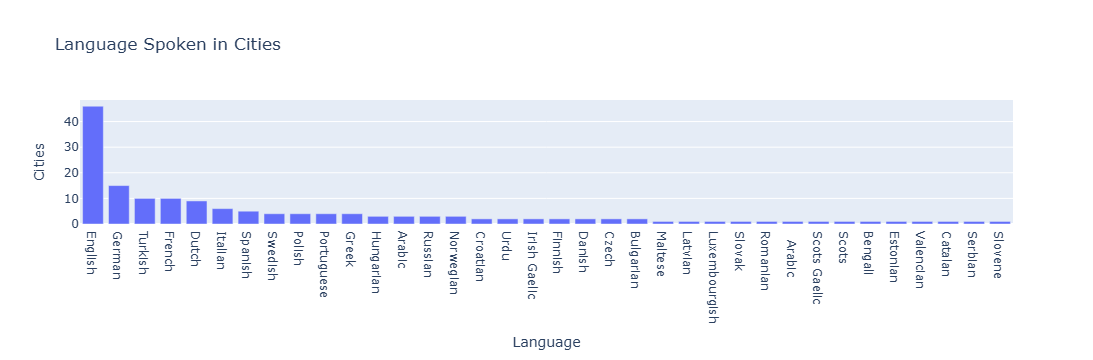

In [801]:
lang_series = (df_final['Main Spoken Languages'].str.split(', '))
lang_exploded = lang_series.explode()
    
lang_counts = lang_exploded.value_counts()
print(f'Top 3 most spoken languages are:\n {lang_counts.head(3)}')

fig = px.bar(
    x=lang_counts.index,
    y=lang_counts.values,
    labels={'x': 'Language', 'y': 'Cities'},
    title='Language Spoken in Cities',
)
fig.show()

<span style="font-size: 23px; color:GREEN;font-weight: bold ;">(Q3)</span>

- 3. a) Entries uploaded before April 2023 need to be updated. Which cities would
            require an update?

In [802]:
from datetime import datetime
df_final['Last Data Update'] = pd.to_datetime(df_final['Last Data Update'])
threshold_date = pd.to_datetime("2023-04-01")
cities_need_update = df_with_dates[df_with_dates['Last Data Update'] < threshold_date][
    ['City_Name', 'Country', 'Last Data Update']
]
print('Answer:')
print("Cities needing update (before 2023-04-01):")
cities_need_update

Answer:
Cities needing update (before 2023-04-01):


,City_Name,Country,Last Data Update
10,Basel,Switzerland,2023-01-19
17,Munich,Germany,2023-03-16
19,Frankfurt am Main,Germany,2023-02-04
36,Lyon,France,2023-03-31
57,Venice,Italy,2023-03-23
80,Gothenburg,Sweden,2023-03-10


- 3.  b) How many days ago was the last update? On what day, month, and year did
            it occur?

In [803]:
today = pd.Timestamp.now().normalize()
df_final['Days since update'] = (today - df_final['Last Data Update']).dt.days

df_final[['City_Name', 'Country', 'Last Data Update', 'Days since update']].sort_values('Days since update', ascending=False).head(10)

min_days = int(df_final['Days since update'].min())
print('Answer:')
print(f"The last update was made : {min_days} days before")

most_recent_row = df_final.loc[df_final['Last Data Update'].idxmax()]
print("The last update occurred on:", most_recent_row['Last Data Update'].date())

Answer:
The last update was made : 345 days before
The last update occurred on: 2024-12-12


<span style="font-size: 23px; color:GREEN;font-weight: bold ;">(Q4)</span>

-  4. a) How are the Unemployment Rate and GDP per Capita distributed and
            related? What does this relationship suggest? 
            Provide a visual representation

In [804]:
unemployment_stats=df_final['Unemployment Rate'].describe()
print(unemployment_stats)

count    84.000000
mean      6.550000
std       4.411963
min       1.400000
25%       3.700000
50%       5.300000
75%       7.650000
max      23.000000
Name: Unemployment Rate, dtype: float64


In [805]:
fig = px.histogram(
    df_final,
    x="Unemployment Rate",
    title="Unemployment Rate Distribution"
)

fig.show()
Skewness=df_final['Unemployment Rate'].skew()
print(f'Skewness:{Skewness}')

Skewness:1.8615137171888896


- ***Distribution of Unemployment Rate***

- The distribution of the Unemployment Rate has a skewness of 1.86, which indicates:
- The distribution is positively skewed (right-skewed), meaning most cities have lower unemployment rates 
- A smaller number of cities have very high unemployment, pulling the tail to the right.

In [806]:
gdp_stats=df_final['GDP per Capita'].describe()
print(gdp_stats)

count        84.000000
mean      51898.070476
std       21534.300543
min       10089.920000
25%       38643.000000
50%       49458.500000
75%       63197.250000
max      146094.000000
Name: GDP per Capita, dtype: float64


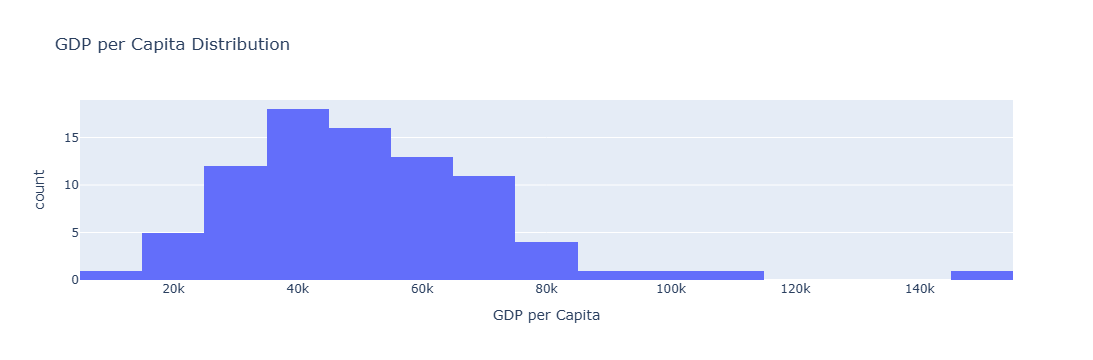

Skewness:1.3351362511859424


In [807]:
fig = px.histogram(
    df_final,
    x="GDP per Capita",
    title="GDP per Capita Distribution"
)

fig.show()
Skewness=df_final['GDP per Capita'].skew()
print(f'Skewness:{Skewness}')

- ***Distribution of GDP per Capita***

- The histogram for GDP per Capita shows how income levels are spread across the cities.
From the plot, we observe:

- The distribution is right-skewed, as the skewness is (>0.5), meaning most cities have lower to medium GDP per Capita, while a smaller number have very high values.

- There are some high-income cities, but they are fewer compared to the rest.

This suggests that income levels are not evenly distributed, and a majority of areas have relatively moderate economic output.

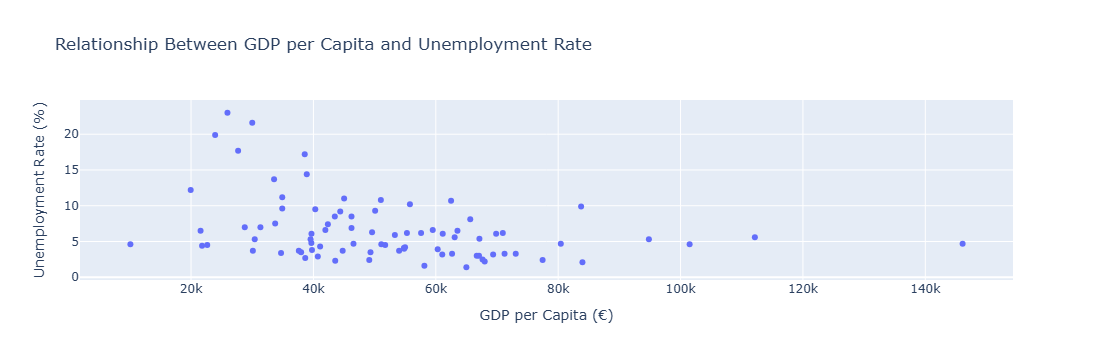

In [808]:
import plotly.express as px

fig = px.scatter(
    df_final,
    x="GDP per Capita",
    y="Unemployment Rate",
    title="Relationship Between GDP per Capita and Unemployment Rate",
    labels={
        "GDP per Capita": "GDP per Capita (€)",
        "Unemployment Rate": "Unemployment Rate (%)"
    }
)

fig.show()


- ***Relationship Between GDP per Capita and Unemployment Rate***

- The scatter plot compares both variables to understand whether economic output (GDP per Capita) is associated with unemployment levels.
- From the scatter plot:

- There is a general downward pattern, which means cities with higher GDP per Capita tend to have lower unemployment rates.

- This does not prove causation, but it shows a visible pattern that cities with higher economic output usually have better employment conditions.

- 4. b) Which are the top 5 cities with the largest difference between the Average
            Monthly Salary and Average Cost of Living? 
            What about the top 5 countries with the smallest average difference? 
            Show these results with meaningful visualizations

Answer:
Top 5 cities with largest difference (salary - cost):
   City_Name  Average Monthly Salary  Average Cost of Living  Affordability
10     Basel                  6366.0                  4239.0         2127.0
34   Tampere                  3500.0                  1600.0         1900.0
33  Helsinki                  3900.0                  2050.0         1850.0
8     Zurich                  6636.0                  4862.0         1774.0
9     Geneva                  5794.0                  4263.0         1531.0


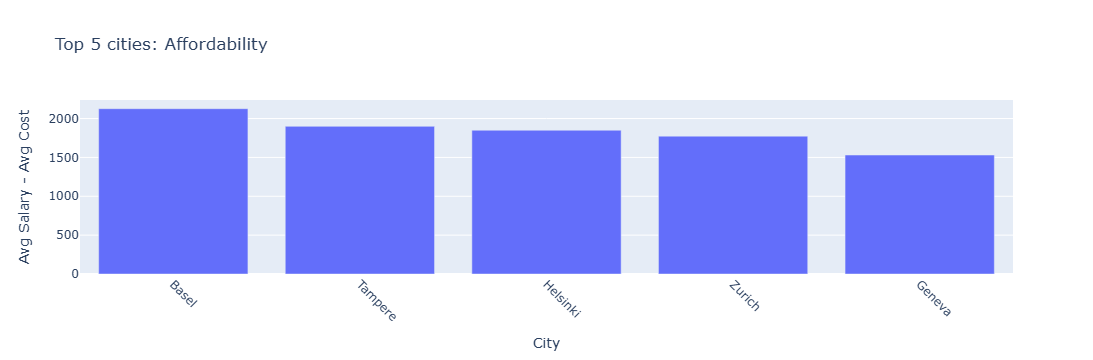

In [823]:
# ensure columns exist
df_final['Affordability'] = df_final['Average Monthly Salary'] - df_final['Average Cost of Living']

# Top 5 cities (largest positive difference)
top5_cities = df_final[['City_Name',  'Average Monthly Salary', 'Average Cost of Living', 'Affordability']].dropna().sort_values('Affordability', ascending=False).head(5)
print('Answer:')
print("Top 5 cities with largest difference (salary - cost):")
print(top5_cities)

fig = px.bar(
    top5_cities,
    x="City_Name",
    y="Affordability",
    title="Top 5 cities: Affordability",
)

fig.update_layout(
    xaxis_title="City",
    yaxis_title="Avg Salary - Avg Cost"
)

fig.show()



plt.figure()
plt.bar(smallest5_countries.index, smallest5_countries.values)
plt.title('Countries with smallest average Salary - Cost')
plt.xlabel('Country')
plt.ylabel('Average (Salary - Cost)')
plt.xticks(rotation=45)
plt.show()


In [835]:
country_diff = df_final.groupby('Country')['Affordability'].mean().sort_values(ascending=True)
smallest5_countries = country_diff.head(5)
print("Top 5 countries with smallest average (Salary - Cost):")
smallest5_countries

Top 5 countries with smallest average (Salary - Cost):


Country
Portugal          -207.500000
Greece            -125.000000
Slovak Republic    -50.000000
Turkiye            -25.000000
Poland             -16.666667
Name: Affordability, dtype: float64

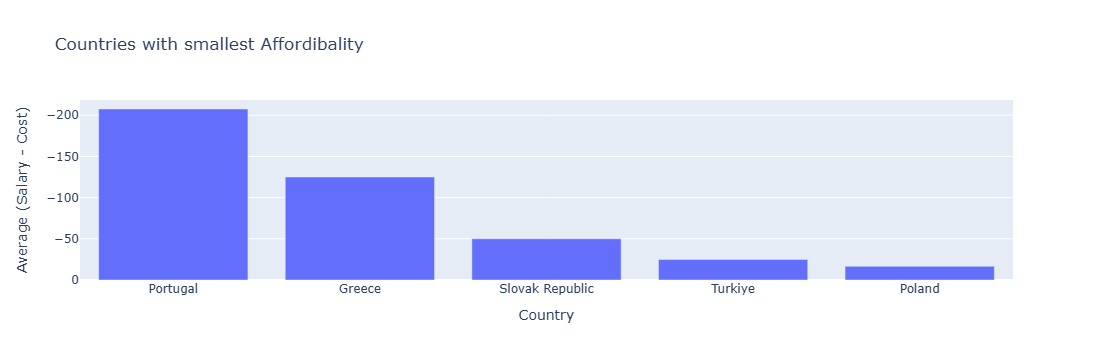

In [833]:
fig = px.bar(
    x=smallest5_countries.index,
    y=smallest5_countries.values,
    title="Countries with smallest Affordibality ",
    labels={"x": "Country", "y": "Average (Salary - Cost)"}
)
fig.update_yaxes(autorange='reversed')
fig.show()

-  4. c) Which is the best city for someone seeking:
 an average monthly salary above €2000,
 a cost of living below or equal to €1600, and
 the lowest unemployment rate possible?

In [854]:
df_final = df_final.rename(columns={"Average Monthly Salary": "AvgSalary", "Average Cost of Living": "AvgCost"})

In [867]:
candidates = df_final.query("AvgSalary > 2000 and AvgCost <= 1600")
candidates = candidates.sort_values(by=['Unemployment Rate', 'Affordability'], ascending=[True, False])

print("Candidate cities meeting salary and cost constraints (sorted by lowest unemployment):")
candidates[['City_Name','Country','AvgSalary','AvgCost','Unemployment Rate','Affordability']].reset_index().head(10)

Candidate cities meeting salary and cost constraints (sorted by lowest unemployment):


,index,City_Name,Country,AvgSalary,AvgCost,Unemployment Rate,Affordability
0,22,Dresden,Germany,3050.0,1530.0,3.8,1520.0
1,21,Leipzig,Germany,2800.0,1600.0,4.3,1200.0
2,4,Gent,Belgium,2400.0,1200.0,5.9,1200.0
3,34,Tampere,Finland,3500.0,1600.0,6.6,1900.0
4,37,Toulouse,France,2600.0,1600.0,8.5,1000.0
5,27,Madrid,Spain,2271.0,1589.0,10.8,682.0
6,29,Valencia,Spain,2400.0,1300.0,13.7,1100.0
7,31,Malaga,Spain,2200.0,1400.0,17.7,800.0
8,30,Seville,Spain,2300.0,1150.0,21.6,1150.0


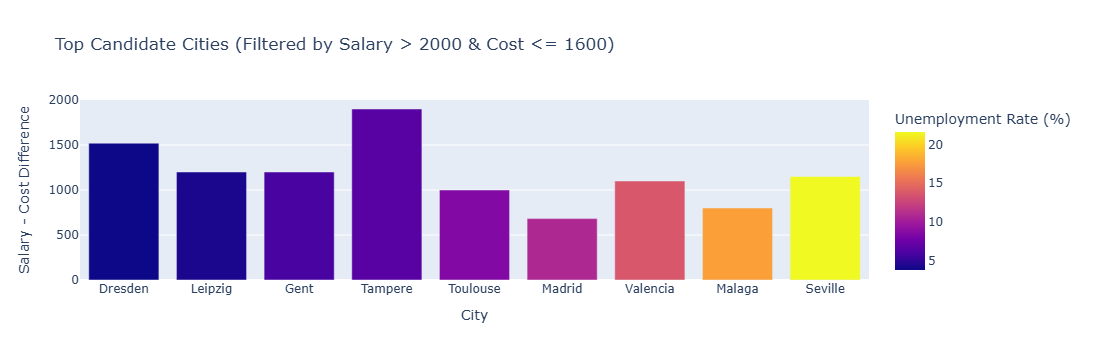

In [869]:
fig = px.bar(
    candidates.head(10),           
    x='City_Name',
    y='Affordability',
    color='Unemployment Rate',      
    title='Top Candidate Cities (Filtered by Salary > 2000 & Cost <= 1600)',
    labels={
        'City_Name': 'City',
        'Affordability': 'Salary - Cost Difference',
        'Unemployment Rate': 'Unemployment Rate (%)'
    }
)

fig.show()